# Introduction to neural networks classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out the data
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check out the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


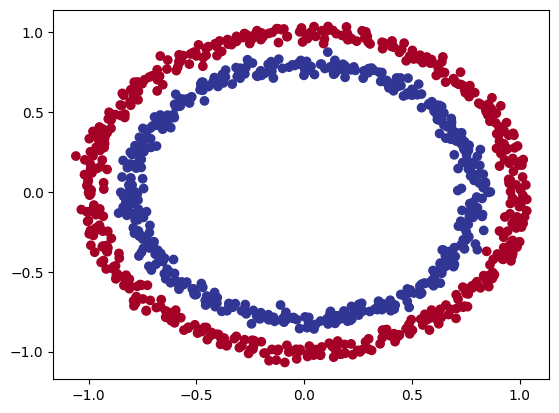

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [10]:
# Check the shapes of X and y
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
# How many samples we're working with?
len(X), len(y)

(1000, 1000)

In [12]:
# View the first sample of features and label
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling
The steps in modelling with TensorFlow are:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [14]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [22]:
# Create the model
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)), # input shape required
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 4.3162 - accuracy: 0.4613
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 4.2113 - accuracy: 0.4350
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 4.1600 - accuracy: 0.4212
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 4.1489 - accuracy: 0.4100
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 4.1296 - accuracy: 0.4112
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 4.0844 - accuracy: 0.4087
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 4.0578 - accuracy: 0.4162
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 4.0101 - accuracy: 0.4225
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 3.9601 - accuracy: 0.4250
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 3.8832 - accuracy: 0.4250
Epoch 11/

<AxesSubplot: >

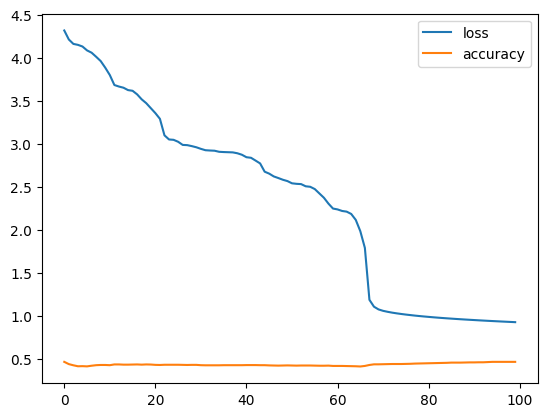

In [23]:
pd.DataFrame(history.history).plot()

In [24]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.8913 - accuracy: 0.4900


[0.8912860751152039, 0.49000000953674316]

## Improving our model
Let's look into our bag of tricks and see if we can improve our model.
1. Create a model - we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. Compiling a model - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. Fitting a model - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [27]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history_2 = model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 4ms/step - loss: 2.9020 - accuracy: 0.4512
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7267 - accuracy: 0.4825
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.5138
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.5000
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.4988
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.4988
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4900
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.4875
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.4938
Epoch 11/

In [26]:
# Evaluate the model
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5350


[0.6933994293212891, 0.5350000262260437]

## Visualizing our model's predictions
To visualize our model predictions, let's create a function `plot_decision_boundary`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones where each class falls

In [34]:
import numpy as np
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function was inspired by two resources:
    * [cs231n course](http://cs231n.github.io/neural-networks-case-study/)
    * https://github.com/GokuMohandas/Made-With-ML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification...")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification...


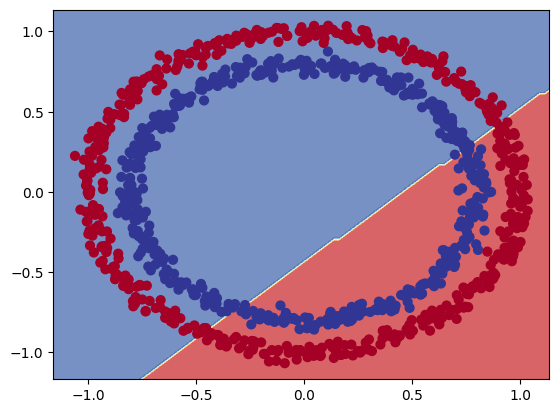

In [33]:
# Check out the decision boundary of our model_2
plot_decision_boundary(model=model_2,
                       X=X,
                       y=y)

In [ ]:
model_2.predict(X_test)